<a href="https://colab.research.google.com/github/Team-AlmaBetter/Credit-Card-Default-Prediction/blob/niharika/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#<b>1. IMPORT LIBRARIES

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV/Excel file I/O (e.g. pd.read_excel), data manipulation
from scipy.stats import randint
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
# here we will import the libraries used for machine learning

#<B>2. DATA PREPARATION

##<b> 2.1 Import Datasets

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
credit = pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction_Project_3/Data _ Resources/default of credit card clients.xls')
credit.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [21]:
credit.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [22]:
credit.shape

(30001, 25)

## 2.2 Converting the column names to proper names

### Renaming column PAY_0 to PAY_1 and default.payment.next.month as DEFAULT - Niharika

In [23]:
new_column_names=list(credit.iloc[0].values)
new_column_names[-1]='DEFAULT'
new_column_names[6]='PAY_1'
old_column_names=list(credit.columns)

In [24]:
old_column_names=list(credit.columns)
dict1=dict(zip(old_column_names,new_column_names))
credit.rename(columns=dict1,inplace=True)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [25]:
credit=credit.iloc[1:,:]
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
credit.drop('ID',axis=1,inplace=True)


### Convert the datatype of all the columns to integer


In [27]:
credit=credit.astype(int)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

### Checking the correlation of DEFAULT variable with other numeric variables

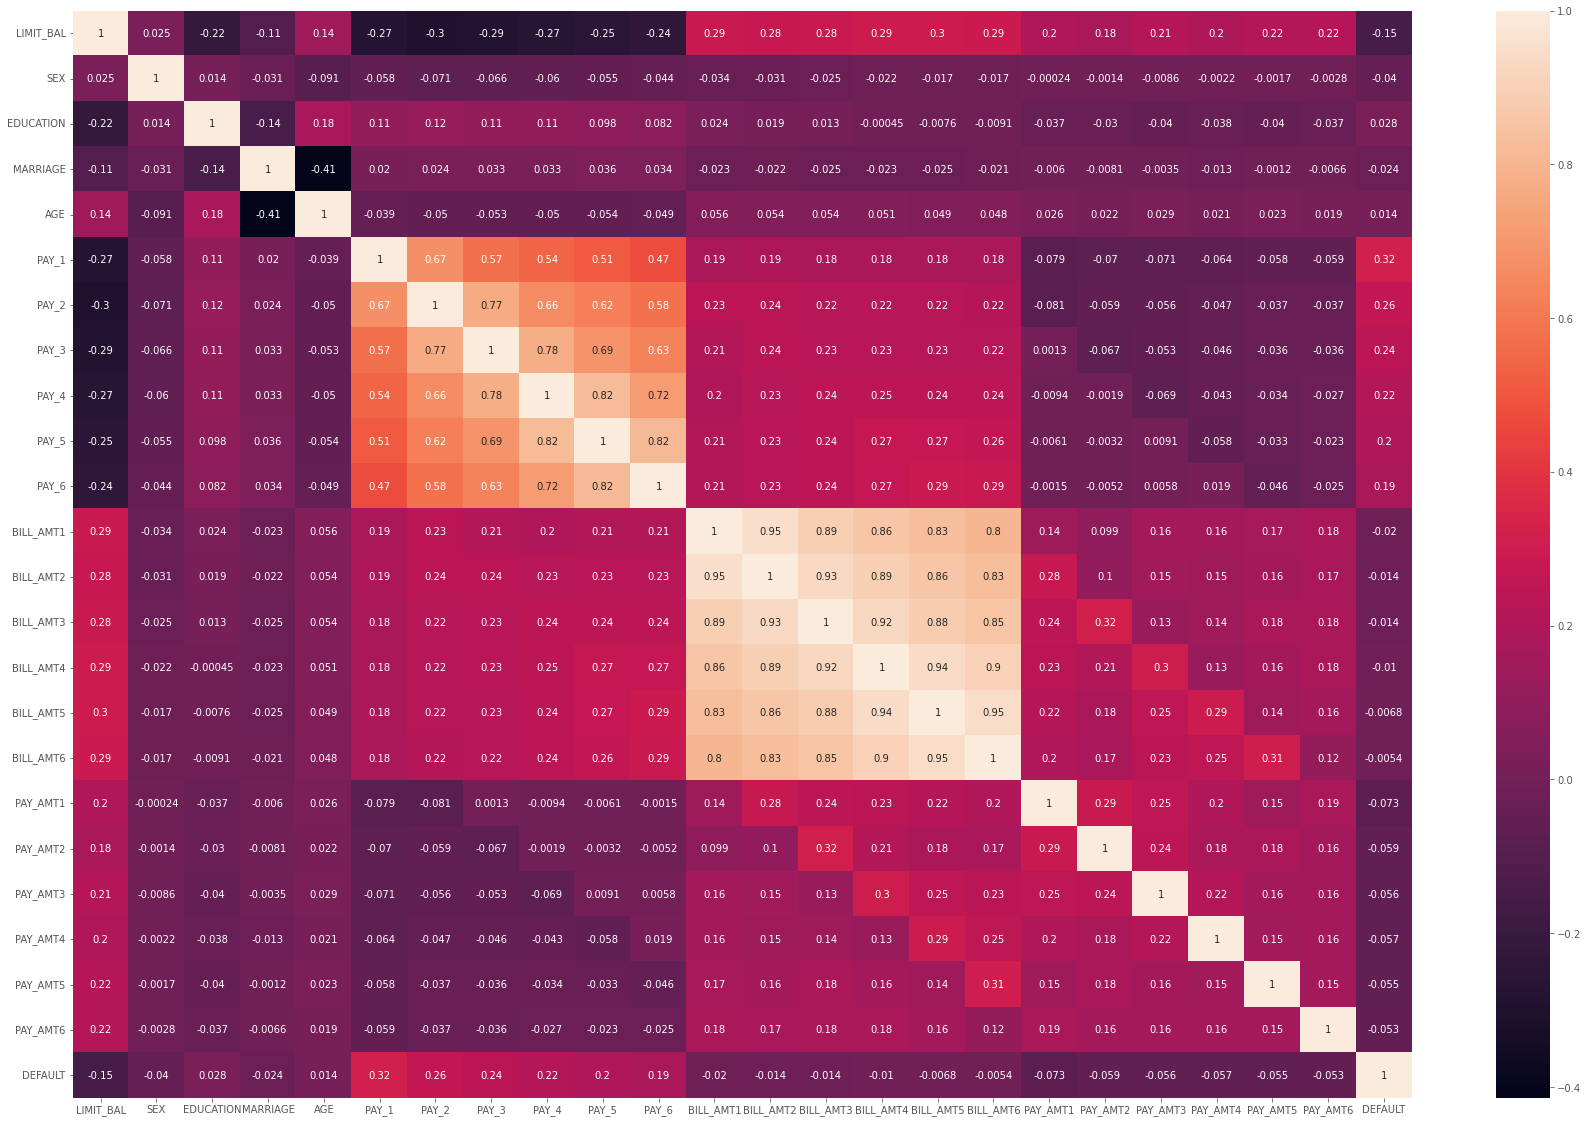

In [28]:
plt.subplots(figsize=(30,20))
sns.heatmap(credit.corr(), annot=True)
plt.show()

### Convert int variables to factors 1. DEFAULT to a categorical variable 

In [29]:
credit['DEFAULT']=pd.Categorical(credit.DEFAULT)

### Convert int variables to factors 1. SEX to a categorical variable 

In [30]:
credit['SEX']=pd.Categorical(credit.SEX)

### Checking the distribution of ‘DEFAULT’ values 

In [31]:
distribution_of_Default=credit['DEFAULT'].value_counts()
distribution_of_Default

0    23364
1     6636
Name: DEFAULT, dtype: int64

### Featuring - Add one feature of GENDER 

DEFAULT      0     1
SEX                 
1         9015  2873
2        14349  3763


<Figure size 432x432 with 0 Axes>

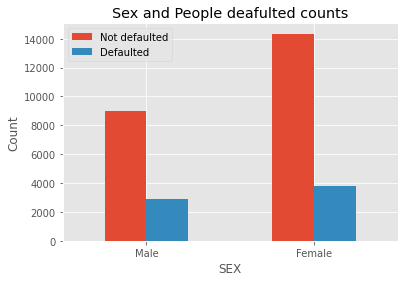

In [32]:
target_count = credit.groupby(['SEX','DEFAULT']).SEX.count().unstack()
print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and People deafulted counts")
plt.show()

# EDUCATION

### Converting EDUCATION to a categorical variable

In [33]:
credit.EDUCATION=pd.Categorical(credit.EDUCATION)

In [34]:
credit.EDUCATION.unique()

[2, 1, 3, 5, 4, 6, 0]
Categories (7, int64): [2, 1, 3, 5, 4, 6, 0]

### Merging 0, 5 and 6 to 4(others)

In [35]:
credit.EDUCATION=credit.apply(lambda x: credit.EDUCATION.replace(0,4) )
credit.EDUCATION=credit.apply(lambda x: credit.EDUCATION.replace(5,4) )
credit.EDUCATION=credit.apply(lambda x: credit.EDUCATION.replace(6,4) )

In [41]:
credit.EDUCATION.unique()

array([2, 1, 3, 4])

### Plotting Bar graph for EDUCATION

1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64


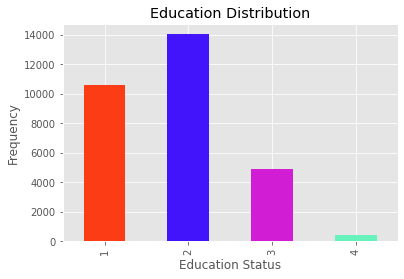

In [37]:
plt.figure()
colors=['#FB3C14','#4214FB','#D11ED4','#67F1BB','#DCE22A','#4EED4C','#F99F16']
print(credit["EDUCATION"].value_counts().sort_index(ascending=True))
p=credit["EDUCATION"].value_counts().sort_index(ascending=True).plot(kind='bar', color=colors)
plt.title('Education Distribution')
plt.xlabel("Education Status")
plt.ylabel("Frequency")
plt.show()

### Find out Default % in all education type

1    2036
2    3330
3    1237
4      33
Name: EDUCATION, dtype: int64


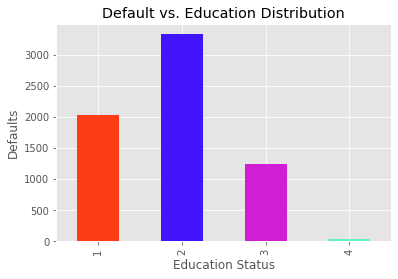

In [38]:
#get all people with defaults
default=credit[credit['DEFAULT']==1]
print(default['EDUCATION'].value_counts().sort_index(ascending=True))

plt.figure()
colors=['#FB3C14','#4214FB','#D11ED4','#67F1BB','#DCE22A','#4EED4C','#F99F16']
p=default["EDUCATION"].value_counts().sort_index(ascending=True).plot(kind='bar', color=colors)
plt.title('Default vs. Education Distribution')
plt.xlabel("Education Status")
plt.ylabel("Defaults")
plt.show()